In [1]:
from bs4 import BeautifulSoup
import requests
import time, os
import pandas as pd
import numpy as np 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
chromedriver = "/usr/share/man/man1/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


In [2]:
url2021 = 'https://www.basketball-reference.com/leagues/NBA_2021_per_game.html'
response2021 = requests.get(url2021)
soup2021 = BeautifulSoup(response2021.content, "html.parser")

url2020 = 'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'
response2020 = requests.get(url2020)
soup2020 = BeautifulSoup(response2020.content, "html.parser")

url2019 = 'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'
response2019 = requests.get(url2019)
soup2019 = BeautifulSoup(response2019.content, "html.parser")

url2018 = 'https://www.basketball-reference.com/leagues/NBA_2018_per_game.html'
response2018 = requests.get(url2018)
soup2018 = BeautifulSoup(response2018.content, "html.parser")

url2017 = 'https://www.basketball-reference.com/leagues/NBA_2017_per_game.html'
response2017 = requests.get(url2017)
soup2017 = BeautifulSoup(response2017.content, "html.parser")

url2016 = 'https://www.basketball-reference.com/leagues/NBA_2016_per_game.html'
response2016 = requests.get(url2016)
soup2016 = BeautifulSoup(response2016.content, "html.parser")

url2015 = 'https://www.basketball-reference.com/leagues/NBA_2015_per_game.html'
response2015 = requests.get(url2015)
soup2015 = BeautifulSoup(response2015.content, "html.parser")

In [3]:
head2015 = soup2015.find(class_='thead')
column_names = head2015.text.replace('\n',',').split(',')
column_names = column_names[2:-1]
table2015 = soup2015.find_all(class_ = 'full_table')
players = []

for i in range(len(table2015)):
    
    player_ = []
    
    for td in table2015[i].find_all('td'):
        player_.append(td.text)

    players.append(player_)
    
df2015 = pd.DataFrame(players,columns = column_names).set_index('Player')

head2016 = soup2016.find(class_='thead')
column_names = head2016.text.replace('\n',',').split(',')
column_names = column_names[2:-1]
table2016 = soup2016.find_all(class_ = 'full_table')
players = []

for i in range(len(table2016)):
    
    player_ = []
    
    for td in table2016[i].find_all('td'):
        player_.append(td.text)

    players.append(player_)
    
df2016 = pd.DataFrame(players,columns = column_names).set_index('Player')

head2017 = soup2017.find(class_='thead')
column_names = head2017.text.replace('\n',',').split(',')
column_names = column_names[2:-1]
table2017 = soup2017.find_all(class_ = 'full_table')
players = []

for i in range(len(table2017)):
    
    player_ = []
    
    for td in table2017[i].find_all('td'):
        player_.append(td.text)

    players.append(player_)
    
df2017 = pd.DataFrame(players,columns = column_names).set_index('Player')

head2018 = soup2018.find(class_='thead')
column_names = head2018.text.replace('\n',',').split(',')
column_names = column_names[2:-1]
table2018 = soup2018.find_all(class_ = 'full_table')
players = []

for i in range(len(table2018)):
    
    player_ = []
    
    for td in table2018[i].find_all('td'):
        player_.append(td.text)

    players.append(player_)
    
df2018 = pd.DataFrame(players,columns = column_names).set_index('Player')

head2019 = soup2019.find(class_='thead')
column_names = head2019.text.replace('\n',',').split(',')
column_names = column_names[2:-1]
table2019 = soup2019.find_all(class_ = 'full_table')
players = []

for i in range(len(table2019)):
    
    player_ = []
    
    for td in table2019[i].find_all('td'):
        player_.append(td.text)

    players.append(player_)
    
df2019 = pd.DataFrame(players,columns = column_names).set_index('Player')

head2020 = soup2020.find(class_='thead')
column_names = head2020.text.replace('\n',',').split(',')
column_names = column_names[2:-1]
table2020 = soup2020.find_all(class_ = 'full_table')
players = []

for i in range(len(table2020)):
    
    player_ = []
    
    for td in table2020[i].find_all('td'):
        player_.append(td.text)

    players.append(player_)
    
df2020 = pd.DataFrame(players,columns = column_names).set_index('Player')

head2021 = soup2021.find(class_='thead')
column_names = head2021.text.replace('\n',',').split(',')
column_names = column_names[2:-1]
table2021 = soup2021.find_all(class_ = 'full_table')
players = []

for i in range(len(table2021)):
    
    player_ = []
    
    for td in table2021[i].find_all('td'):
        player_.append(td.text)

    players.append(player_)
    
df2021 = pd.DataFrame(players,columns = column_names).set_index('Player')


In [4]:
salary2015 = []

for i in range(1,14):
    url = "http://www.espn.com/nba/salaries/_/year/2015/page/{}".format(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.content,'lxml')
    
    odd = soup.find_all("tr", {"class": "oddrow"})
    for item in odd:
        table_odd = item.text
        salary2015.append(table_odd)
    even = soup.find_all('tr',{'class':'evenrow'})
    for item in even:
        table_even = item.text
        salary2015.append(table_even)
        
salary2016 = []

for i in range(1,14):
    url = "http://www.espn.com/nba/salaries/_/year/2016/page/{}".format(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.content,'lxml')
    
    odd = soup.find_all("tr", {"class": "oddrow"})
    for item in odd:
        table_odd = item.text
        salary2016.append(table_odd)
    even = soup.find_all('tr',{'class':'evenrow'})
    for item in even:
        table_even = item.text
        salary2016.append(table_even)
        
salary2017 = []

for i in range(1,15):
    url = "http://www.espn.com/nba/salaries/_/year/2017/page/{}".format(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.content,'lxml')
    
    odd = soup.find_all("tr", {"class": "oddrow"})
    for item in odd:
        table_odd = item.text
        salary2017.append(table_odd)
    even = soup.find_all('tr',{'class':'evenrow'})
    for item in even:
        table_even = item.text
        salary2017.append(table_even)
        
salary2018 = []

for i in range(1,15):
    url = "http://www.espn.com/nba/salaries/_/year/2018/page/{}".format(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.content,'lxml')
    
    odd = soup.find_all("tr", {"class": "oddrow"})
    for item in odd:
        table_odd = item.text
        salary2018.append(table_odd)
    even = soup.find_all('tr',{'class':'evenrow'})
    for item in even:
        table_even = item.text
        salary2018.append(table_even)
        
salary2019 = []

for i in range(1,13):
    url = "http://www.espn.com/nba/salaries/_/year/2019/page/{}".format(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.content,'lxml')
    
    odd = soup.find_all("tr", {"class": "oddrow"})
    for item in odd:
        table_odd = item.text
        salary2019.append(table_odd)
    even = soup.find_all('tr',{'class':'evenrow'})
    for item in even:
        table_even = item.text
        salary2019.append(table_even)
        
salary2020 = []

for i in range(1,14):
    url = "http://www.espn.com/nba/salaries/_/year/2020/page/{}".format(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.content,'lxml')
    
    odd = soup.find_all("tr", {"class": "oddrow"})
    for item in odd:
        table_odd = item.text
        salary2020.append(table_odd)
    even = soup.find_all('tr',{'class':'evenrow'})
    for item in even:
        table_even = item.text
        salary2020.append(table_even)
        
salary2021 = []

for i in range(1,14):
    url = "http://www.espn.com/nba/salaries/_/year/2021/page/{}".format(i)
    r = requests.get(url)
    soup = BeautifulSoup(r.content,'lxml')
    
    odd = soup.find_all("tr", {"class": "oddrow"})
    for item in odd:
        table_odd = item.text
        salary2021.append(table_odd)
    even = soup.find_all('tr',{'class':'evenrow'})
    for item in even:
        table_even = item.text
        salary2021.append(table_even)

In [5]:
s2015 = pd.DataFrame(salary2015)
s2015.to_csv(r'/home/calvinyu/Regression/salary2015')
s2015 = pd.read_csv('salary2015.csv')
s2015.drop(['Unnamed: 0','Unnamed: 2'],axis = 1,inplace = True)
s2015['Player'] = s2015['Unnamed: 1']
s2015['Salary'] = s2015['Unnamed: 3']
s2015.drop(['Unnamed: 1','Unnamed: 3'],axis = 1 ,inplace = True)
s2015 = df2015.merge(s2015 , on ='Player' , how = 'inner')
s2015['Year'] = '2015'

s2016 = pd.DataFrame(salary2016)
s2016.to_csv(r'/home/calvinyu/Regression/salary2016')
s2016 = pd.read_csv('salary2016.csv')
s2016.drop(['Unnamed: 0','Unnamed: 2'],axis = 1,inplace = True)
s2016['Player'] = s2016['Unnamed: 1']
s2016['Salary'] = s2016['Unnamed: 3']
s2016.drop(['Unnamed: 1','Unnamed: 3'],axis = 1 ,inplace = True)
s2016 = df2016.merge(s2016 , on ='Player' , how = 'inner')
s2016['Year'] = '2016'

s2017 = pd.DataFrame(salary2017)
s2017.to_csv(r'/home/calvinyu/Regression/salary2017')
s2017 = pd.read_csv('salary2017.csv')
s2017.drop(['Unnamed: 0','Unnamed: 2'],axis = 1,inplace = True)
s2017['Player'] = s2017['Unnamed: 1']
s2017['Salary'] = s2017['Unnamed: 3']
s2017.drop(['Unnamed: 1','Unnamed: 3'],axis = 1 ,inplace = True)
s2017 = df2017.merge(s2017 , on ='Player' , how = 'inner')
s2017['Year'] = '2017'

s2018 = pd.DataFrame(salary2018)
s2018.to_csv(r'/home/calvinyu/Regression/salary2018')
s2018 = pd.read_csv('salary2018.csv')
s2018.drop(['Unnamed: 0','Unnamed: 2'],axis = 1,inplace = True)
s2018['Player'] = s2018['Unnamed: 1']
s2018['Salary'] = s2018['Unnamed: 3']
s2018.drop(['Unnamed: 1','Unnamed: 3'],axis = 1 ,inplace = True)
s2018 = df2018.merge(s2018 , on ='Player' , how = 'inner')
s2018['Year'] = '2018'

s2019 = pd.DataFrame(salary2019)
s2019.to_csv(r'/home/calvinyu/Regression/salary2019')
s2019 = pd.read_csv('salary2019.csv')
s2019.drop(['Unnamed: 0','Unnamed: 2'],axis = 1,inplace = True)
s2019['Player'] = s2019['Unnamed: 1']
s2019['Salary'] = s2019['Unnamed: 3']
s2019.drop(['Unnamed: 1','Unnamed: 3'],axis = 1 ,inplace = True)
s2019 = df2019.merge(s2019 , on ='Player' , how = 'inner')
s2019['Year'] = '2019'

s2020 = pd.DataFrame(salary2020)
s2020.to_csv(r'/home/calvinyu/Regression/salary2020')
s2020 = pd.read_csv('salary2020.csv')
s2020.drop(['Unnamed: 0','Unnamed: 2'],axis = 1,inplace = True)
s2020['Player'] = s2020['Unnamed: 1']
s2020['Salary'] = s2020['Unnamed: 3']
s2020.drop(['Unnamed: 1','Unnamed: 3'],axis = 1 ,inplace = True)
s2020 = df2020.merge(s2020 , on ='Player' , how = 'inner')
s2020['Year'] = '2020'

s2021 = pd.DataFrame(salary2021)
s2021.to_csv(r'/home/calvinyu/Regression/salary')
s2021 = pd.read_csv('salary.csv')
s2021['Player'] = s2021['Unnamed: 0']
s2021['Salary'] = s2021['Unnamed: 2']
s2021.drop(['Unnamed: 0','Unnamed: 2'],axis = 1 ,inplace = True)
s2021 = df2021.merge(s2021 , on ='Player' , how = 'inner')
s2021['Year'] = '2021'

In [6]:
df = pd.concat([s2015,s2016,s2017,s2018,s2019,s2020,s2021])

In [7]:
df['Age'] = pd.to_numeric(df['Age'])
df['G'] = pd.to_numeric(df['G'])
df['GS'] = pd.to_numeric(df['GS'])
df['MP'] = pd.to_numeric(df['MP'])
df['FG'] = pd.to_numeric(df['FG'])
df['FGA'] = pd.to_numeric(df['FGA'])
df['FG%'] = pd.to_numeric(df['FG%'])
df['3P'] = pd.to_numeric(df['3P'])
df['3PA'] = pd.to_numeric(df['3PA'])
df['3P%'] = pd.to_numeric(df['3P%'])
df['2P'] = pd.to_numeric(df['2P'])
df['2PA'] = pd.to_numeric(df['2P%'])
df['2P%'] = pd.to_numeric(df['Age'])
df['eFG%'] = pd.to_numeric(df['eFG%'])
df['FT'] = pd.to_numeric(df['FT'])
df['FTA'] = pd.to_numeric(df['FTA'])
df['FT%'] = pd.to_numeric(df['FT%'])
df['ORB'] = pd.to_numeric(df['ORB'])
df['DRB'] = pd.to_numeric(df['DRB'])
df['TRB'] = pd.to_numeric(df['TRB'])
df['AST'] = pd.to_numeric(df['AST'])
df['STL'] = pd.to_numeric(df['STL'])
df['BLK'] = pd.to_numeric(df['BLK'])
df['TOV'] = pd.to_numeric(df['TOV'])
df['PF'] = pd.to_numeric(df['PF'])
df['PTS'] = pd.to_numeric(df['PTS'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2834 entries, 0 to 389
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      2834 non-null   object 
 1   Pos         2834 non-null   object 
 2   Age         2834 non-null   int64  
 3   Tm          2834 non-null   object 
 4   G           2834 non-null   int64  
 5   GS          2834 non-null   int64  
 6   MP          2834 non-null   float64
 7   FG          2834 non-null   float64
 8   FGA         2834 non-null   float64
 9   FG%         2831 non-null   float64
 10  3P          2834 non-null   float64
 11  3PA         2834 non-null   float64
 12  3P%         2640 non-null   float64
 13  2P          2834 non-null   float64
 14  2PA         2822 non-null   float64
 15  2P%         2834 non-null   int64  
 16  eFG%        2831 non-null   float64
 17  FT          2834 non-null   float64
 18  FTA         2834 non-null   float64
 19  FT%         2771 non-null   

In [9]:
df.drop(['Unnamed: 1'],axis = 1,inplace = True)

In [10]:
df['eFG%'] = df['eFG%']*100

In [11]:
df['eFG%'].head()

0    48.6
1    46.5
2    54.4
3    43.2
4    49.1
Name: eFG%, dtype: float64

In [12]:
df['eFG%'].mean()

50.4645354998234

In [13]:
df['eFG%'].fillna(df['eFG%'].mean(),inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2834 entries, 0 to 389
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  2834 non-null   object 
 1   Pos     2834 non-null   object 
 2   Age     2834 non-null   int64  
 3   Tm      2834 non-null   object 
 4   G       2834 non-null   int64  
 5   GS      2834 non-null   int64  
 6   MP      2834 non-null   float64
 7   FG      2834 non-null   float64
 8   FGA     2834 non-null   float64
 9   FG%     2831 non-null   float64
 10  3P      2834 non-null   float64
 11  3PA     2834 non-null   float64
 12  3P%     2640 non-null   float64
 13  2P      2834 non-null   float64
 14  2PA     2822 non-null   float64
 15  2P%     2834 non-null   int64  
 16  eFG%    2834 non-null   float64
 17  FT      2834 non-null   float64
 18  FTA     2834 non-null   float64
 19  FT%     2771 non-null   float64
 20  ORB     2834 non-null   float64
 21  DRB     2834 non-null   float64
 22  T

In [15]:
df['Pos'] = df['Pos'].apply(lambda x : x[:2])

In [99]:
df[df['Pos'] == 'F']


Player Pos  Age   Tm  G  GS   MP   FG  FGA  FG%  ...  DRB  TRB  \
2718  James Nunnally   F   30  NOP  1   0  9.0  0.0  3.0  0.0  ...  2.0  2.0   

      AST  STL  BLK  TOV   PF  PTS   Salary  Year  
2718  0.0  0.0  0.0  0.0  0.0  0.0  1349383  2021  

[1 rows x 31 columns]

In [96]:
df['Pos'].unique()

array(['PF', 'SG', 'C', 'SF', 'PG', 'F', 'C-'], dtype=object)

In [97]:

df.loc[2729,'Pos'] = 'C'

In [100]:
df.loc[2718,'Pos'] = 'SF'

In [101]:
df['Pos'].unique()

array(['PF', 'SG', 'C', 'SF', 'PG'], dtype=object)

In [20]:
df = df.reset_index(drop=True)

In [21]:
df['FT%'] = df['FT%']*100

In [22]:
df['FT%'].mean()

74.25254420786719

In [23]:
df['FT%'].fillna(0 ,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  2834 non-null   object 
 1   Pos     2834 non-null   object 
 2   Age     2834 non-null   int64  
 3   Tm      2834 non-null   object 
 4   G       2834 non-null   int64  
 5   GS      2834 non-null   int64  
 6   MP      2834 non-null   float64
 7   FG      2834 non-null   float64
 8   FGA     2834 non-null   float64
 9   FG%     2831 non-null   float64
 10  3P      2834 non-null   float64
 11  3PA     2834 non-null   float64
 12  3P%     2640 non-null   float64
 13  2P      2834 non-null   float64
 14  2PA     2822 non-null   float64
 15  2P%     2834 non-null   int64  
 16  eFG%    2834 non-null   float64
 17  FT      2834 non-null   float64
 18  FTA     2834 non-null   float64
 19  FT%     2834 non-null   float64
 20  ORB     2834 non-null   float64
 21  DRB     2834 non-null   float64
 22  

In [25]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Salary',
       'Year'],
      dtype='object')

In [26]:
smaller_df = df.loc[:,['Pos', 'Age', 'Tm', 'G', 'GS', 'MP','eFG%','FT%','TRB','AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','Year','Salary']]

In [27]:
smaller_df.describe()

Age            G           GS           MP         eFG%  \
count  2834.000000  2834.000000  2834.000000  2834.000000  2834.000000   
mean     26.230064    52.334862    25.468948    21.027452    50.464535   
std       4.265045    22.432054    27.274123     8.895222     8.807325   
min      19.000000     1.000000     0.000000     0.700000     0.000000   
25%      23.000000    36.000000     2.000000    14.400000    47.100000   
50%      26.000000    56.000000    13.000000    21.000000    50.800000   
75%      29.000000    72.000000    48.000000    28.500000    54.800000   
max      43.000000    83.000000    82.000000    38.700000   150.000000   

               FT%          TRB          AST          STL          BLK  \
count  2834.000000  2834.000000  2834.000000  2834.000000  2834.000000   
mean     72.601905     3.795272     2.028546     0.676817     0.428582   
std      16.797694     2.445492     1.830195     0.421060     0.430034   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      66.700000     2.100000     0.800000     0.400000     0.100000   
50%      76.000000     3.300000     1.400000     0.600000     0.300000   
75%      82.800000     4.900000     2.600000     0.900000     0.500000   
max     100.000000    16.000000    11.700000     2.400000     3.700000   

               TOV           PF          PTS        Salary  
count  2834.000000  2834.000000  2834.000000  2.834000e+03  
mean      1.191637     1.790649     9.131969  6.541661e+06  
std       0.807241     0.725031     6.111485  7.555592e+06  
min       0.000000     0.000000     0.000000  4.970900e+04  
25%       0.600000     1.300000     4.600000  1.512601e+06  
50%       1.000000     1.800000     7.600000  3.285120e+06  
75%       1.500000     2.300000    12.300000  8.960230e+06  
max       5.700000     4.100000    36.100000  4.300636e+07

In [28]:
smaller_df[smaller_df['G'] == 83]

Pos  Age   Tm   G  GS    MP  eFG%   FT%  TRB  AST  STL  BLK  TOV   PF  \
371  PF   29  TOT  83  35  27.7  45.6  49.8  6.4  3.3  1.0  1.4  2.5  2.7   

      PTS  Year   Salary  
371  12.4  2015  2077000

In [29]:
smaller_df.loc[371,'G'] = 82

In [30]:
smaller_df[smaller_df['eFG%'] == 150]

Pos  Age   Tm  G  GS   MP   eFG%  FT%  TRB  AST  STL  BLK  TOV   PF  PTS  \
1502  SG   24  UTA  1   0  1.0  150.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0   

      Year  Salary  
1502  2018  815615

In [31]:
sorted(smaller_df['eFG%'],reverse = True)

[150.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 87.5,
 80.0,
 78.60000000000001,
 77.8,
 77.7,
 75.0,
 75.0,
 74.2,
 73.5,
 71.6,
 71.39999999999999,
 71.39999999999999,
 71.1,
 71.1,
 70.7,
 70.3,
 70.1,
 70.0,
 69.8,
 69.39999999999999,
 69.39999999999999,
 69.39999999999999,
 69.3,
 69.19999999999999,
 68.60000000000001,
 68.5,
 68.4,
 68.10000000000001,
 68.0,
 67.5,
 67.4,
 67.4,
 67.30000000000001,
 67.10000000000001,
 67.10000000000001,
 67.0,
 67.0,
 66.9,
 66.9,
 66.7,
 66.7,
 66.7,
 66.7,
 66.7,
 66.60000000000001,
 66.60000000000001,
 66.5,
 66.10000000000001,
 66.10000000000001,
 66.0,
 66.0,
 65.9,
 65.7,
 65.4,
 65.3,
 65.2,
 65.2,
 65.10000000000001,
 65.0,
 64.9,
 64.9,
 64.8,
 64.8,
 64.8,
 64.8,
 64.8,
 64.7,
 64.7,
 64.60000000000001,
 64.60000000000001,
 64.5,
 64.5,
 64.4,
 64.4,
 64.3,
 64.3,
 64.3,
 64.3,
 64.2,
 64.2,
 64.2,
 64.2,
 64.1,
 64.1,
 64.0,
 63.9,
 63.9,
 63.7,
 63.6,
 63.6,
 63.5,
 63.5,
 63.5,
 63.4,
 63.3,
 63.3,
 63.3,
 63.3,
 63.2,
 63.

In [32]:
smaller_df.describe()

Age            G           GS           MP         eFG%  \
count  2834.000000  2834.000000  2834.000000  2834.000000  2834.000000   
mean     26.230064    52.334510    25.468948    21.027452    50.464535   
std       4.265045    22.431579    27.274123     8.895222     8.807325   
min      19.000000     1.000000     0.000000     0.700000     0.000000   
25%      23.000000    36.000000     2.000000    14.400000    47.100000   
50%      26.000000    56.000000    13.000000    21.000000    50.800000   
75%      29.000000    72.000000    48.000000    28.500000    54.800000   
max      43.000000    82.000000    82.000000    38.700000   150.000000   

               FT%          TRB          AST          STL          BLK  \
count  2834.000000  2834.000000  2834.000000  2834.000000  2834.000000   
mean     72.601905     3.795272     2.028546     0.676817     0.428582   
std      16.797694     2.445492     1.830195     0.421060     0.430034   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      66.700000     2.100000     0.800000     0.400000     0.100000   
50%      76.000000     3.300000     1.400000     0.600000     0.300000   
75%      82.800000     4.900000     2.600000     0.900000     0.500000   
max     100.000000    16.000000    11.700000     2.400000     3.700000   

               TOV           PF          PTS        Salary  
count  2834.000000  2834.000000  2834.000000  2.834000e+03  
mean      1.191637     1.790649     9.131969  6.541661e+06  
std       0.807241     0.725031     6.111485  7.555592e+06  
min       0.000000     0.000000     0.000000  4.970900e+04  
25%       0.600000     1.300000     4.600000  1.512601e+06  
50%       1.000000     1.800000     7.600000  3.285120e+06  
75%       1.500000     2.300000    12.300000  8.960230e+06  
max       5.700000     4.100000    36.100000  4.300636e+07

<Figure size 2160x2160 with 0 Axes>

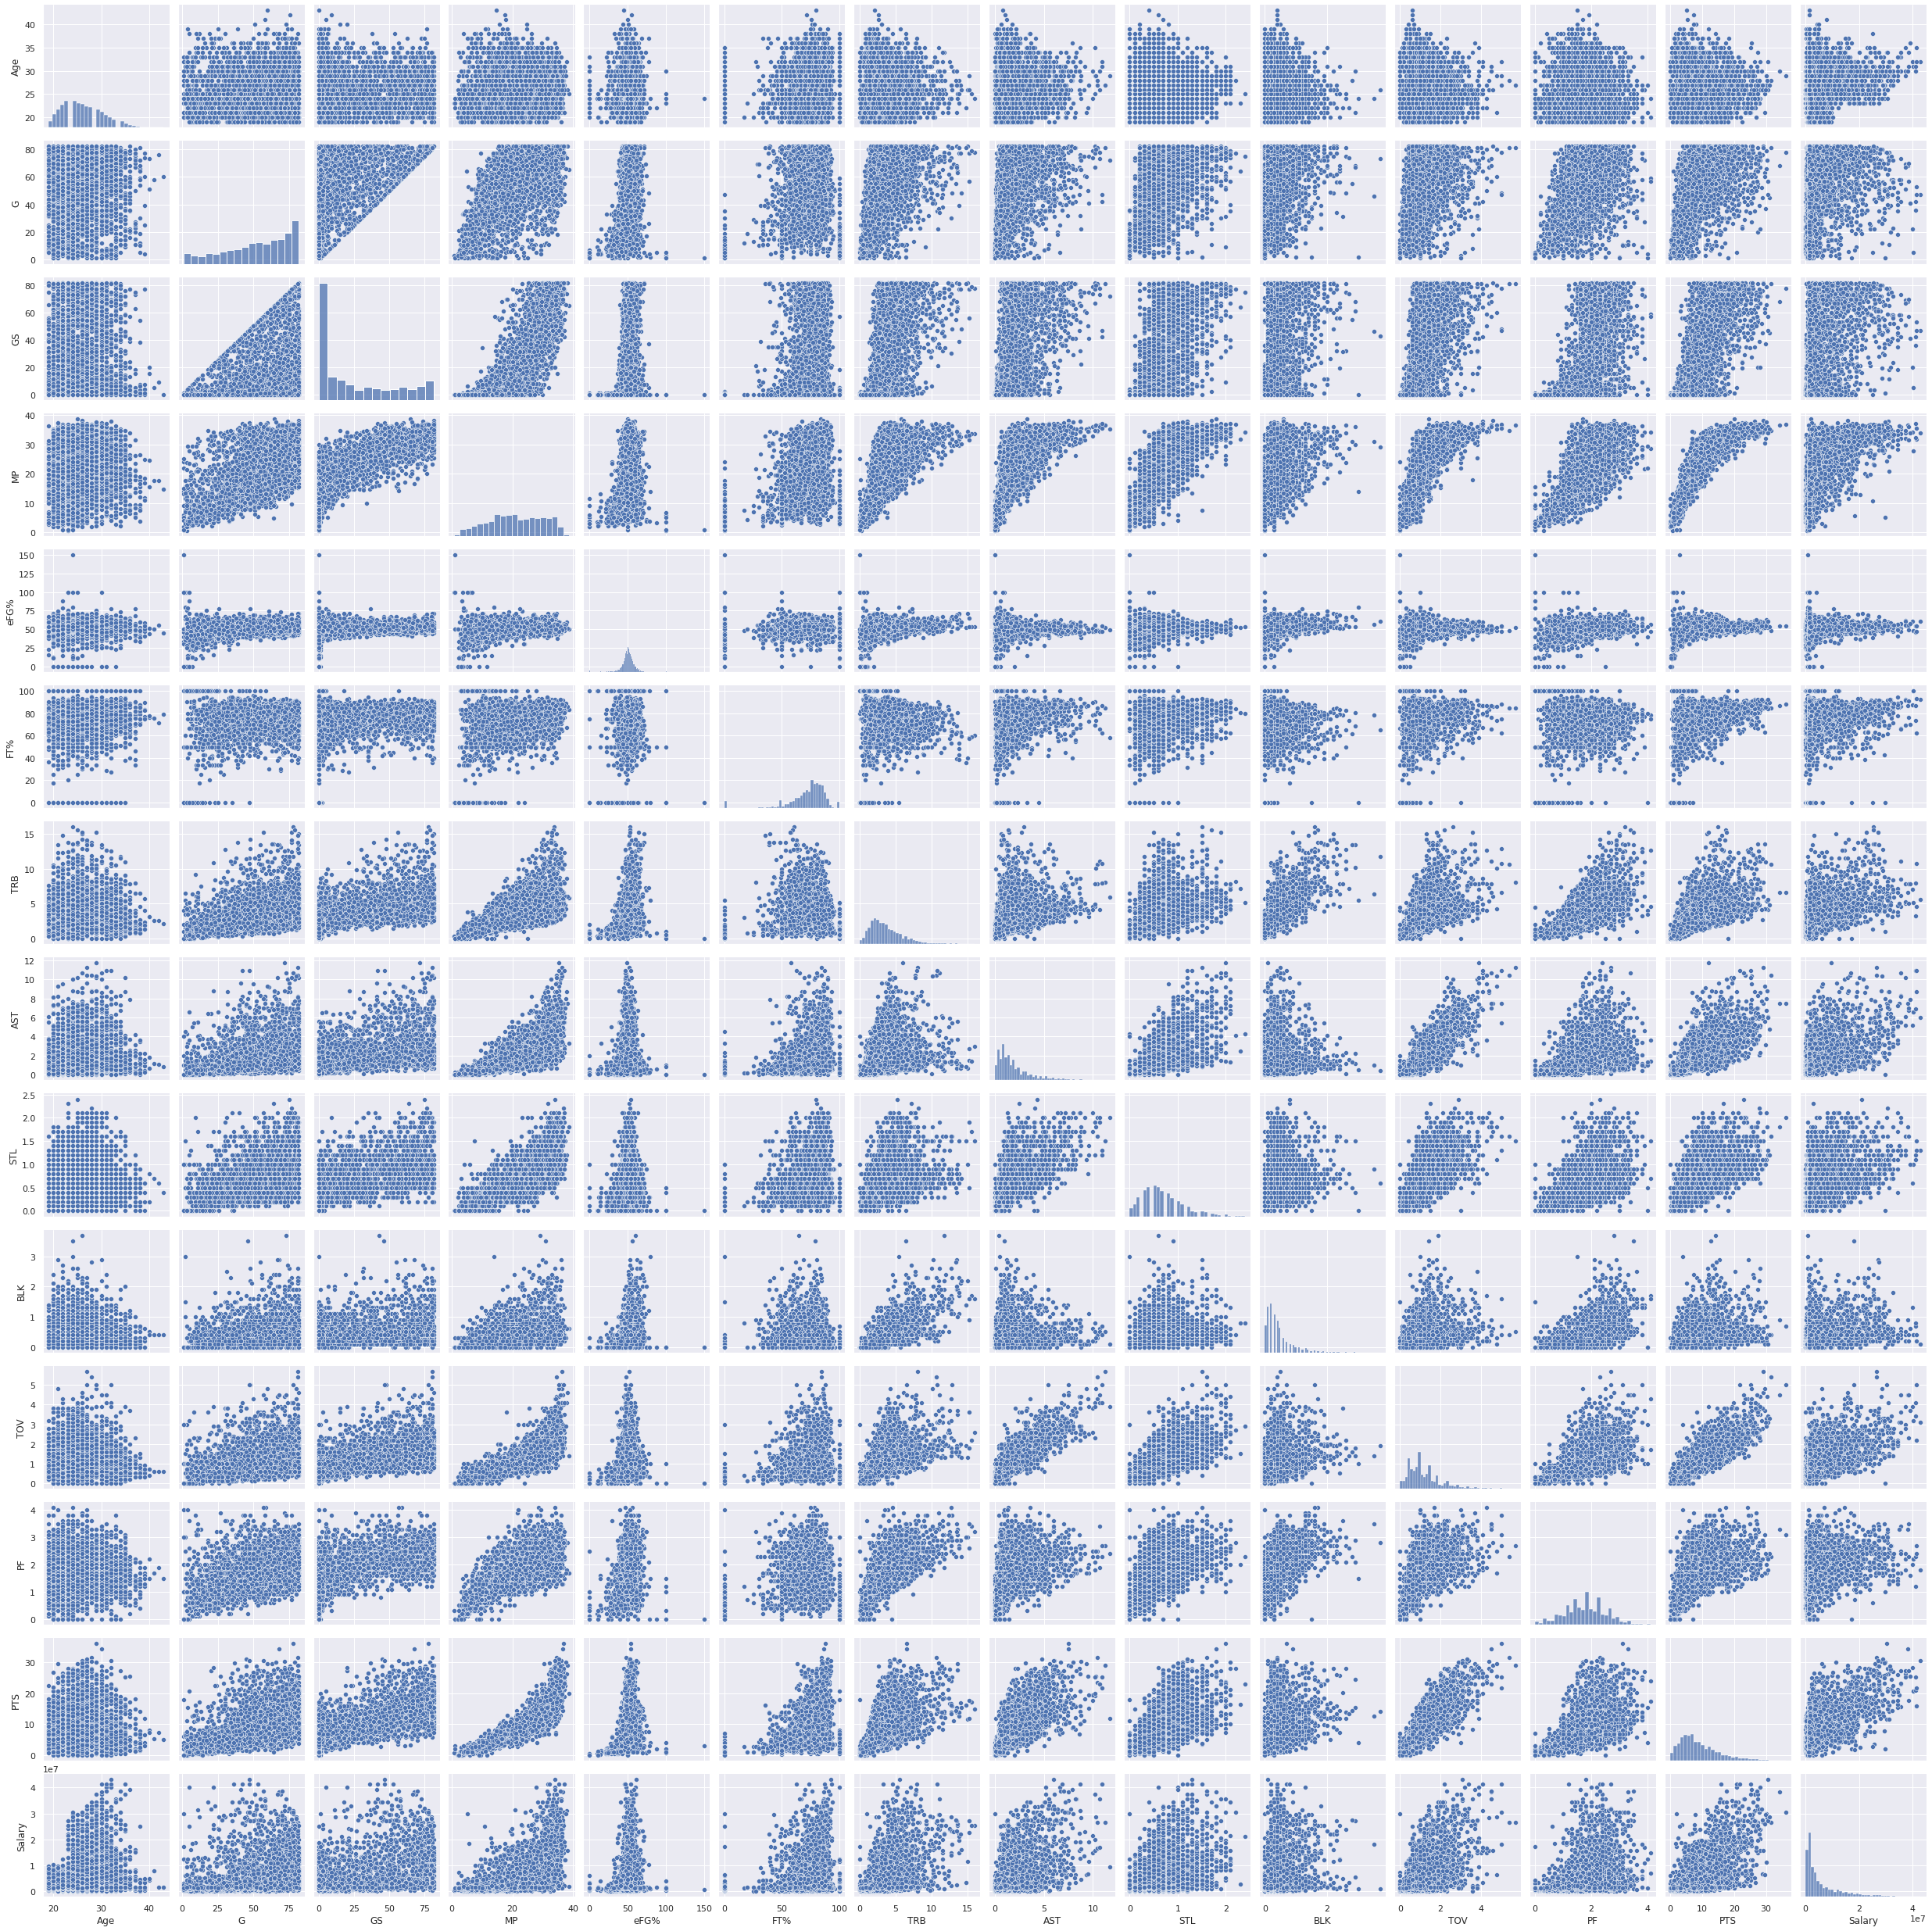

In [33]:
plt.figure(figsize=(30,30))
sns.pairplot(smaller_df)

Text(0.5, 1.0, 'Log_Salary')

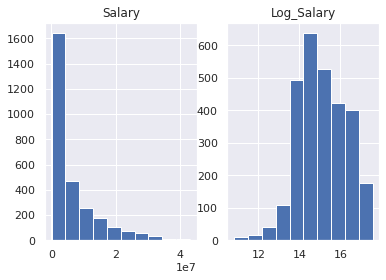

In [34]:
f,ax = plt.subplots(1,2)

ax[0].hist(smaller_df.Salary)
ax[0].set_title('Salary')
ax[1].hist(np.log(smaller_df.Salary))
ax[1].set_title('Log_Salary')

In [35]:
def build_grid_search_est(model, X, y, cv=5, **params):

    kf = KFold()
    grid_est = GridSearchCV(model, param_grid=params, cv=kf, 
                            return_train_score=False)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        df[param] = df.params.apply(lambda val: val[param])
    return grid_est

In [36]:
kf = KFold(n_splits=10, shuffle=True)

In [37]:
def split_and_validate(X,y):
    
    X, X_test, y, y_test = train_test_split(X, y, test_size=.2)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25)
    
    kf = KFold(n_splits=10, shuffle=True)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    lm_cross_val_score = cross_val_score(lm, X_train, y_train, cv=kf, scoring='r2')
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.values)
    X_val_scaled = scaler.transform(X_val.values)
    X_test_scaled = scaler.transform(X_test.values)
    

    ridge_grid_est = build_grid_search_est(Ridge(), X_train, y_train, cv=kf,
                                alpha=np.logspace(-4, -1, 10))
    reg_alpha = ridge_grid_est.best_estimator_.alpha
    
    
    lm_reg = Ridge(alpha = reg_alpha)
    lm_reg.fit(X_train_scaled, y_train)
    lm_reg_cross_val_score = cross_val_score(lm_reg, X_train_scaled, y_train, cv=kf, scoring='r2')
    ridge_grid_est = build_grid_search_est(Ridge(), X_train, y_train, cv=kf,
                                alpha=np.logspace(-4, -1, 10))
    
    
    
    lasso_grid_est = build_grid_search_est(Lasso(), X_train, y_train, cv=kf,
                                    alpha=np.logspace(-4, -1, 30))
    lasso_alpha = lasso_grid_est.best_estimator_.alpha
    lm_lasso = Lasso(alpha = lasso_alpha)
    lm_lasso.fit(X_train_scaled, y_train)
    lm_lasso_cross_val_score = cross_val_score(lm_lasso, X_train_scaled, y_train, cv=kf, scoring='r2')

    
    poly = PolynomialFeatures(degree=2) 

    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)
    
    
    
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_val_poly_scaled = scaler.fit_transform(X_val_poly)
    X_test_poly_scaled = scaler.fit_transform(X_test_poly)

    lm_poly = LinearRegression()
    lm_poly.fit(X_train_poly, y_train)
    lm_poly_cross_val_score = cross_val_score(lm_poly, X_train_poly, y_train, cv=kf, scoring='r2')
    

    ridge_grid_est_poly = build_grid_search_est(Ridge(), X_train_poly_scaled, y_train, cv=kf,
                                    alpha=np.logspace(-4, -1, 10))
    ridge_alpha_poly = ridge_grid_est_poly.best_estimator_.alpha
    lm_reg_poly = Ridge(alpha=ridge_alpha_poly)
    lm_reg_poly.fit(X_train_poly_scaled, y_train)
    lm_reg_poly_cross_val_score = cross_val_score(lm_reg_poly, X_train_poly_scaled, y_train, cv=kf, scoring='r2')
    
    
    lasso_grid_est_poly = build_grid_search_est(Lasso(), X_train_poly_scaled, y_train, cv=kf,
                                    alpha=np.logspace(-4, -1, 30))
    lasso_alpha_poly = lasso_grid_est_poly.best_estimator_.alpha
    lm_lasso_poly = Lasso(alpha = lasso_alpha_poly)
    lm_lasso_poly.fit(X_train_poly_scaled, y_train)
    lm_lasso_poly_cross_val_score = cross_val_score(lm_lasso_poly, X_train_poly_scaled, y_train, cv=kf, scoring='r2')
    
    print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')
    print(f'Linear Regression mean val R^2: {np.mean(lm_reg_cross_val_score):.3f}:')

    
    print(f'Ridge Alpha Best_estimator : {reg_alpha:.3f}')
    print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')
    print(f'Ridge Regression mean val R^2: {np.mean(lm_reg_cross_val_score):.3f}')
   
          
    print(f'Lasso Alpha Best_estimator : {lasso_alpha:.3f}')
    print(f'Lasso Regression val R^2: {lm_lasso.score(X_val_scaled, y_val):.3f}')
    print(f'Lasso Regression mean val R^2: {np.mean(lm_lasso_cross_val_score):.3f}')
    
    print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
    print(f'Degree 2 polynomial Regression mean val R^2: {np.mean(lm_poly_cross_val_score):.3f}')

    
    print(f'Degree 2 polynomial Ridge Alpha Best_estimator : {ridge_alpha_poly:.3f}')      
    print(f'Degree 2 polynomial Ridge Regression val R^2: {lm_reg_poly.score(X_val_poly_scaled, y_val):.3f}')
    print(f'Degree 2 polynomial Ridge Regression mean val R^2: {np.mean(lm_reg_poly_cross_val_score):.3f}')

          
          
    print(f'Degree 2 polynomial Lasso Alpha Best_estimator : {lasso_alpha_poly:.3f}')  
    print(f'Degree 2 polynomial Lasso Regression val R^2: {lm_lasso_poly.score(X_val_poly_scaled, y_val):.3f}')
    print(f'Degree 2 polynomial Lasso Regression mean val R^2: {np.mean(lm_lasso_poly_cross_val_score):.3f}')

In [38]:
X = smaller_df.loc[:,[ 'Age', 'G', 'GS', 'MP','eFG%','FT%','TRB','AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]

y = smaller_df['Salary']

<AxesSubplot:>

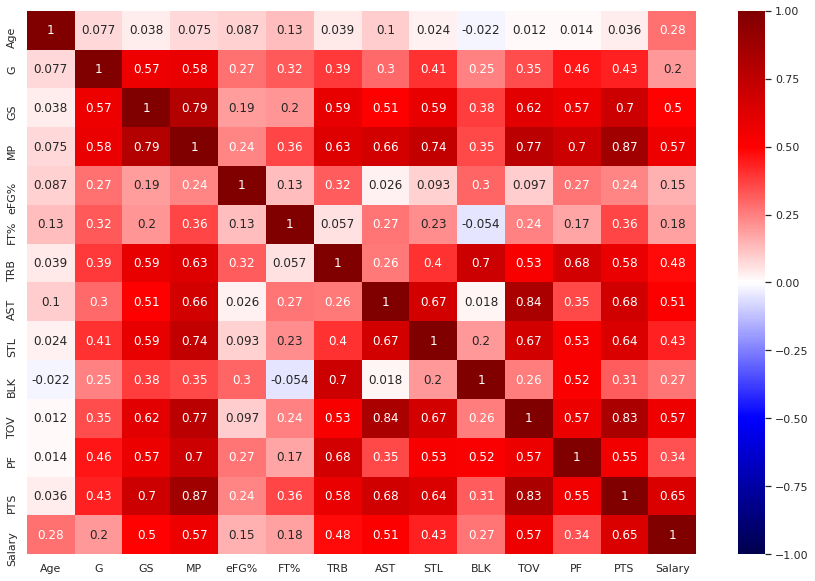

In [39]:
plt.figure(figsize = (15,10))
sns.heatmap(smaller_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

In [40]:
split_and_validate(X,y)

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2872783856658978e+16, tolerance: 8296121017297.473
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2437090855463628e+16, tolerance: 8157552443697.889
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.35029616251471e+16, tolerance: 8084506616161.858
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2437090391499972e+16, tolerance: 8157552443697.889
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3502961018405814e+16, tolerance: 8084506616161.858
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2402054691008942e+16, tolerance: 7999875071029.995
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/en

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3502959022017844e+16, tolerance: 8084506616161.858
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2402052636004738e+16, tolerance: 7999875071029.995
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.30440209916368e+16, tolerance: 7777915177874.247
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.24020458743315e+16, tolerance: 7999875071029.995
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3044011423181898e+16, tolerance: 7777915177874.247
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.287277343905206e+16, tolerance: 8296121017297.473
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.304397993966327e+16, tolerance: 7777915177874.247
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2872749039343262e+16, tolerance: 8296121017297.473
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2437060928152012e+16, tolerance: 8157552443697.889
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/env

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2872668755641912e+16, tolerance: 8296121017297.473
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.243699192004193e+16, tolerance: 8157552443697.889
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.350283224406759e+16, tolerance: 8084506616161.858
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4722704004237714e+16, tolerance: 9118272535958.654
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4677757221266146e+16, tolerance: 9278927339428.0
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.458617770330422e+16, tolerance: 9057852427484.996
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/

Linear Regression val R^2: 0.526
Linear Regression mean val R^2: 0.537:
Ridge Alpha Best_estimator : 0.100
Ridge Regression val R^2: 0.526
Ridge Regression mean val R^2: 0.537
Lasso Alpha Best_estimator : 0.100
Lasso Regression val R^2: 0.526
Lasso Regression mean val R^2: 0.533
Degree 2 polynomial regression val R^2: 0.605
Degree 2 polynomial Regression mean val R^2: 0.599
Degree 2 polynomial Ridge Alpha Best_estimator : 0.100
Degree 2 polynomial Ridge Regression val R^2: 0.596
Degree 2 polynomial Ridge Regression mean val R^2: 0.608
Degree 2 polynomial Lasso Alpha Best_estimator : 0.100
Degree 2 polynomial Lasso Regression val R^2: 0.590
Degree 2 polynomial Lasso Regression mean val R^2: 0.602


In [41]:
split_and_validate(X,np.log(y))

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.34320243285123, tolerance: 0.194359241487818
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.676095746637, tolerance: 0.1966770926237829
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293.5500644762491, tolerance: 0.19727692686045212
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.25796941042427, tolerance: 0.1966770926237829
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90.45186074941034, tolerance: 0.19727692686045212
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161.5906042167295, tolerance: 0.1943450611387301
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/l

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.646110444693363, tolerance: 0.19727692686045212
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.886793354916335, tolerance: 0.1943450611387301
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.746135608995473, tolerance: 0.1963559388622986
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis

Linear Regression val R^2: 0.470
Linear Regression mean val R^2: 0.460:
Ridge Alpha Best_estimator : 0.100
Ridge Regression val R^2: 0.470
Ridge Regression mean val R^2: 0.460
Lasso Alpha Best_estimator : 0.002
Lasso Regression val R^2: 0.470
Lasso Regression mean val R^2: 0.458
Degree 2 polynomial regression val R^2: 0.491
Degree 2 polynomial Regression mean val R^2: 0.457
Degree 2 polynomial Ridge Alpha Best_estimator : 0.100
Degree 2 polynomial Ridge Regression val R^2: 0.489
Degree 2 polynomial Ridge Regression mean val R^2: 0.464
Degree 2 polynomial Lasso Alpha Best_estimator : 0.004
Degree 2 polynomial Lasso Regression val R^2: 0.485
Degree 2 polynomial Lasso Regression mean val R^2: 0.477


In [42]:
X2 = X.copy()
X2['Pos'] = smaller_df['Pos']

split_and_validate(pd.get_dummies(X2,drop_first = True),y)

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1331677944040498e+16, tolerance: 7671799200185.576
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.188580766265264e+16, tolerance: 7941181852659.911
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.12030193762588e+16, tolerance: 7438263763567.686
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.188580703466381e+16, tolerance: 7941181852659.911
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1203018224980438e+16, tolerance: 7438263763567.686
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1173938962985496e+16, tolerance: 7572257666118.776
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/env

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1203014436877398e+16, tolerance: 7438263763567.686
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.117393645628752e+16, tolerance: 7572257666118.776
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2027701754094716e+16, tolerance: 7616317129471.628
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/env

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1173928208386218e+16, tolerance: 7572257666118.776
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2027692501218136e+16, tolerance: 7616317129471.628
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.133166416730704e+16, tolerance: 7671799200185.576
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/env

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2027662056046436e+16, tolerance: 7616317129471.628
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1331631900108406e+16, tolerance: 7671799200185.576
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1885767155238978e+16, tolerance: 7941181852659.911
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/en

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.13315257308e+16, tolerance: 7671799200185.576
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.188567375168154e+16, tolerance: 7941181852659.911
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1202773876879912e+16, tolerance: 7438263763567.686
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/met

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3197455190435948e+16, tolerance: 8635930172975.682
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3297024985059904e+16, tolerance: 8557830199474.373
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3094699237070586e+16, tolerance: 8330215237964.45
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/env

Linear Regression val R^2: 0.570
Linear Regression mean val R^2: 0.541:
Ridge Alpha Best_estimator : 0.100
Ridge Regression val R^2: 0.570
Ridge Regression mean val R^2: 0.541
Lasso Alpha Best_estimator : 0.100
Lasso Regression val R^2: 0.570
Lasso Regression mean val R^2: 0.540
Degree 2 polynomial regression val R^2: 0.589
Degree 2 polynomial Regression mean val R^2: 0.589
Degree 2 polynomial Ridge Alpha Best_estimator : 0.100
Degree 2 polynomial Ridge Regression val R^2: 0.590
Degree 2 polynomial Ridge Regression mean val R^2: 0.590
Degree 2 polynomial Lasso Alpha Best_estimator : 0.100
Degree 2 polynomial Lasso Regression val R^2: 0.586
Degree 2 polynomial Lasso Regression mean val R^2: 0.592


/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3277509781514176e+16, tolerance: 8721169138088.949
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2760384707113094e+16, tolerance: 8411446413270.895
  model = cd_fast.enet_coordinate_descent(


In [44]:
X3 = X.copy()
X3['Year'] = smaller_df['Year']

split_and_validate(pd.get_dummies(X3,drop_first = True),y)

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0209870628517624e+16, tolerance: 7942847662343.195
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0892044809630846e+16, tolerance: 8003181046117.501
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0545744560063528e+16, tolerance: 7897277072262.904
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/en

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0892044184455038e+16, tolerance: 8003181046117.501
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0545743797642784e+16, tolerance: 7897277072262.904
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.051095604619821e+16, tolerance: 7679986113345.821
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/env

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0545741289016082e+16, tolerance: 7897277072262.904
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.051095381430517e+16, tolerance: 7679986113345.821
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0727128095183046e+16, tolerance: 8189141151244.037
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/env

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0510946470606152e+16, tolerance: 7679986113345.821
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0727120847924434e+16, tolerance: 8189141151244.037
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.020985089250763e+16, tolerance: 7942847662343.195
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/env

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0727097002058628e+16, tolerance: 8189141151244.037
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0209804667563558e+16, tolerance: 7942847662343.195
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0892004483589592e+16, tolerance: 8003181046117.501
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/en

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0209652570703056e+16, tolerance: 7942847662343.195
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0891911497590574e+16, tolerance: 8003181046117.501
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.05455819835433e+16, tolerance: 7897277072262.904
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.205694076980075e+16, tolerance: 8759934666950.531
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2013058465272814e+16, tolerance: 8789298089269.869
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1985760224302678e+16, tolerance: 8878728697286.248
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/env

Linear Regression val R^2: 0.534
Linear Regression mean val R^2: 0.556:
Ridge Alpha Best_estimator : 0.100
Ridge Regression val R^2: 0.534
Ridge Regression mean val R^2: 0.556
Lasso Alpha Best_estimator : 0.100
Lasso Regression val R^2: 0.534
Lasso Regression mean val R^2: 0.558
Degree 2 polynomial regression val R^2: 0.596
Degree 2 polynomial Regression mean val R^2: 0.624
Degree 2 polynomial Ridge Alpha Best_estimator : 0.100
Degree 2 polynomial Ridge Regression val R^2: 0.622
Degree 2 polynomial Ridge Regression mean val R^2: 0.633
Degree 2 polynomial Lasso Alpha Best_estimator : 0.100
Degree 2 polynomial Lasso Regression val R^2: 0.621
Degree 2 polynomial Lasso Regression mean val R^2: 0.625


/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2212721285629338e+16, tolerance: 8782492546881.044
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2248506229640446e+16, tolerance: 9176351701301.316
  model = cd_fast.enet_coordinate_descent(


In [45]:
X4 = X3.copy()
X4['Pos'] = smaller_df['Pos']

split_and_validate(pd.get_dummies(X4,drop_first = True),y)

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9599777124878762.0, tolerance: 7604755446602.679
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9190061443923398.0, tolerance: 7751892217866.826
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9169699221339012.0, tolerance: 7541458716777.642
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9169698586489892.0, tolerance: 7541458716777.642
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9409825773759226.0, tolerance: 7425681962847.579
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9859298142768602.0, tolerance: 7967214804266.558
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9409824152260634.0, tolerance: 7425681962847.579
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9859296321726952.0, tolerance: 7967214804266.558
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9599774509367904.0, tolerance: 7604755446602.679
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9859290329869912.0, tolerance: 7967214804266.558
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9599768048672656.0, tolerance: 7604755446602.679
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9190054118667764.0, tolerance: 7751892217866.826
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9599746790723966.0, tolerance: 7604755446602.679
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9190036961769714.0, tolerance: 7751892217866.826
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9169658271164750.0, tolerance: 7541458716777.642
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9189980509755344.0, tolerance: 7751892217866.826
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9169563844795476.0, tolerance: 7541458716777.642
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9409721180534486.0, tolerance: 7425681962847.579
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.110099759257368e+16, tolerance: 8766206787470.093
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0735416705330524e+16, tolerance: 8652712745159.704
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1051154906452404e+16, tolerance: 8640963651710.554
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/env

Linear Regression val R^2: 0.556
Linear Regression mean val R^2: 0.558:
Ridge Alpha Best_estimator : 0.100
Ridge Regression val R^2: 0.556
Ridge Regression mean val R^2: 0.558
Lasso Alpha Best_estimator : 0.100
Lasso Regression val R^2: 0.556
Lasso Regression mean val R^2: 0.549
Degree 2 polynomial regression val R^2: 0.604
Degree 2 polynomial Regression mean val R^2: 0.599
Degree 2 polynomial Ridge Alpha Best_estimator : 0.100
Degree 2 polynomial Ridge Regression val R^2: 0.618
Degree 2 polynomial Ridge Regression mean val R^2: 0.602
Degree 2 polynomial Lasso Alpha Best_estimator : 0.100
Degree 2 polynomial Lasso Regression val R^2: 0.609
Degree 2 polynomial Lasso Regression mean val R^2: 0.612


/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0879762045004452e+16, tolerance: 8500488041844.058
  model = cd_fast.enet_coordinate_descent(


In [46]:
X5 = X3.copy()
X5['Pts_per_minute_play'] = X4['PTS']/X4['MP']

split_and_validate(pd.get_dummies(X5,drop_first = True),y)

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0772733207004034e+16, tolerance: 8153467251077.779
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1455649188105462e+16, tolerance: 8453749210025.415
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0987123108340736e+16, tolerance: 7616228973842.766
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/en

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.145564829702407e+16, tolerance: 8453749210025.415
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0987122272936416e+16, tolerance: 7616228973842.766
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1173522923221942e+16, tolerance: 7787216115046.035
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/env

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0987119524168598e+16, tolerance: 7616228973842.766
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1173519996172446e+16, tolerance: 7787216115046.035
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1595999297013008e+16, tolerance: 8028368650501.031
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/en

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1595992042295948e+16, tolerance: 8028368650501.031
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0772720326164456e+16, tolerance: 8153467251077.779
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1455631990290096e+16, tolerance: 8453749210025.415
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/en

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0772690157275576e+16, tolerance: 8153467251077.779
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1455591710377624e+16, tolerance: 8453749210025.415
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0987069222003806e+16, tolerance: 7616228973842.766
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/en

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1455459176490164e+16, tolerance: 8453749210025.415
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0986944969559192e+16, tolerance: 7616228973842.766
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1173334117965518e+16, tolerance: 7787216115046.035
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/en

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.264724241558202e+16, tolerance: 8915409015998.549
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2885214220382986e+16, tolerance: 9154959520773.63
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2900209058621812e+16, tolerance: 8831001272858.918
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs

Linear Regression val R^2: 0.555
Linear Regression mean val R^2: 0.523:
Ridge Alpha Best_estimator : 0.100
Ridge Regression val R^2: 0.555
Ridge Regression mean val R^2: 0.523
Lasso Alpha Best_estimator : 0.100
Lasso Regression val R^2: 0.555
Lasso Regression mean val R^2: 0.531
Degree 2 polynomial regression val R^2: 0.613
Degree 2 polynomial Regression mean val R^2: 0.544
Degree 2 polynomial Ridge Alpha Best_estimator : 0.000
Degree 2 polynomial Ridge Regression val R^2: 0.596
Degree 2 polynomial Ridge Regression mean val R^2: 0.502
Degree 2 polynomial Lasso Alpha Best_estimator : 0.100
Degree 2 polynomial Lasso Regression val R^2: 0.615
Degree 2 polynomial Lasso Regression mean val R^2: 0.507


/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3195450273888176e+16, tolerance: 9172574370131.06
  model = cd_fast.enet_coordinate_descent(


In [47]:
X6 = X5.copy()
X6['Ast_to_MP_ratio'] = X5['AST']/X5['MP']
split_and_validate(pd.get_dummies(X6,drop_first = True),y)

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0395366938523312e+16, tolerance: 7201044860907.256
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0208851606606154e+16, tolerance: 7446263391011.671
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9375000970678312.0, tolerance: 7410190885472.274
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/m

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0208850799778604e+16, tolerance: 7446263391011.671
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9375000182354676.0, tolerance: 7410190885472.274
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1225809005437368e+16, tolerance: 7847654422684.35
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/me

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1225805016692706e+16, tolerance: 7847654422684.35
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0855995837887656e+16, tolerance: 7700691364778.8545
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0395361208127326e+16, tolerance: 7201044860907.256
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/en

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0855986932022874e+16, tolerance: 7700691364778.8545
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0395347053204082e+16, tolerance: 7201044860907.256
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0208836034847e+16, tolerance: 7446263391011.671
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.02087995630951e+16, tolerance: 7446263391011.671
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9374950121043164.0, tolerance: 7410190885472.274
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1225732022915546e+16, tolerance: 7847654422684.35
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/meti

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9374832869457482.0, tolerance: 7410190885472.274
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1225551718084938e+16, tolerance: 7847654422684.35
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.085582395722718e+16, tolerance: 7700691364778.8545
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/me

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1625759662931352e+16, tolerance: 8210386809778.351
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.19731784596646e+16, tolerance: 8598252397697.357
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2143162051069216e+16, tolerance: 8594902393590.942
  model = cd_fast.enet_coordinate_descent(


Linear Regression val R^2: 0.591
Linear Regression mean val R^2: 0.536:
Ridge Alpha Best_estimator : 0.100
Ridge Regression val R^2: 0.591
Ridge Regression mean val R^2: 0.536
Lasso Alpha Best_estimator : 0.100
Lasso Regression val R^2: 0.591
Lasso Regression mean val R^2: 0.535
Degree 2 polynomial regression val R^2: 0.526
Degree 2 polynomial Regression mean val R^2: 0.580
Degree 2 polynomial Ridge Alpha Best_estimator : 0.100
Degree 2 polynomial Ridge Regression val R^2: 0.654
Degree 2 polynomial Ridge Regression mean val R^2: 0.581
Degree 2 polynomial Lasso Alpha Best_estimator : 0.100
Degree 2 polynomial Lasso Regression val R^2: 0.664
Degree 2 polynomial Lasso Regression mean val R^2: 0.579


/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2312268649774212e+16, tolerance: 8570793188677.456
  model = cd_fast.enet_coordinate_descent(


In [48]:
X7 = X5.copy()
X7['DEF_CONTRIBUTION'] = (X5['STL']/X5['MP'])*2 +X5['BLK']/X5['MP'] - X5['PF']/X5['MP']
split_and_validate(pd.get_dummies(X7,drop_first = True),y)

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9882025812181914.0, tolerance: 7798706940837.335
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0362926143837418e+16, tolerance: 8390032184575.639
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0200872789696034e+16, tolerance: 8088634344621.633
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/m

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.036292545853902e+16, tolerance: 8390032184575.639
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.020087181532231e+16, tolerance: 8088634344621.633
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9974138870931620.0, tolerance: 8085402735439.3125
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/me

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0200868609296592e+16, tolerance: 8088634344621.633
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9974136793760260.0, tolerance: 8085402735439.3125
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9921232486726716.0, tolerance: 7834456379062.967
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/meti

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9974129959158796.0, tolerance: 8085402735439.3125
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9921225072967976.0, tolerance: 7834456379062.967
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9882012084759668.0, tolerance: 7798706940837.335
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/li

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9921200679208692.0, tolerance: 7834456379062.967
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9881979932686960.0, tolerance: 7798706940837.335
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0362881939811382e+16, tolerance: 8390032184575.639
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9881874138532452.0, tolerance: 7798706940837.335
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0362780012891194e+16, tolerance: 8390032184575.639
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0200665014395036e+16, tolerance: 8088634344621.633
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/m

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1441548656689894e+16, tolerance: 8991529179460.547
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1747101214130314e+16, tolerance: 9179979760437.63
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1108106530305108e+16, tolerance: 8867272051890.232
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/env

Linear Regression val R^2: 0.556
Linear Regression mean val R^2: 0.564:
Ridge Alpha Best_estimator : 0.100
Ridge Regression val R^2: 0.556
Ridge Regression mean val R^2: 0.564
Lasso Alpha Best_estimator : 0.100
Lasso Regression val R^2: 0.556
Lasso Regression mean val R^2: 0.564
Degree 2 polynomial regression val R^2: -0.149
Degree 2 polynomial Regression mean val R^2: 0.574
Degree 2 polynomial Ridge Alpha Best_estimator : 0.000
Degree 2 polynomial Ridge Regression val R^2: 0.556
Degree 2 polynomial Ridge Regression mean val R^2: 0.575
Degree 2 polynomial Lasso Alpha Best_estimator : 0.100
Degree 2 polynomial Lasso Regression val R^2: 0.609
Degree 2 polynomial Lasso Regression mean val R^2: 0.546


/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1660456481691298e+16, tolerance: 9179093616452.979
  model = cd_fast.enet_coordinate_descent(


In [49]:
X8 = X5.copy()
X8['Tm'] = smaller_df['Tm']
split_and_validate(pd.get_dummies(X8,drop_first=True),y)

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4342396647994191.0, tolerance: 7687815411786.052
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4648946535928431.0, tolerance: 7724852636051.328
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5029850650472751.0, tolerance: 7938650015582.428
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4648946496235547.0, tolerance: 7724852636051.328
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5029850569732455.0, tolerance: 7938650015582.428
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4715899476518123.0, tolerance: 7761310540930.308
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5029850304068742.0, tolerance: 7938650015582.428
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4715899233421298.0, tolerance: 7761310540930.308
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4841136979742420.0, tolerance: 7810988253163.565
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4715898433548904.0, tolerance: 7761310540930.308
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4841135551104488.0, tolerance: 7810988253163.565
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4342393378113542.5, tolerance: 7687815411786.052
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4841130850354877.0, tolerance: 7810988253163.565
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4342385719422457.0, tolerance: 7687815411786.052
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4648943975537315.0, tolerance: 7724852636051.328
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4342360518592011.0, tolerance: 7687815411786.052
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4648938071179122.0, tolerance: 7724852636051.328
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5029833432265303.0, tolerance: 7938650015582.428
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib

/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6591345972188455.0, tolerance: 8879080451044.828
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6387918044387869.0, tolerance: 9021220430571.098
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5929215269070197.0, tolerance: 8458385020428.703
  model = cd_fast.enet_coordinate_descent(
/home/calvinyu/miniconda3/envs/metis/lib

Linear Regression val R^2: 0.543
Linear Regression mean val R^2: 0.536:
Ridge Alpha Best_estimator : 0.100
Ridge Regression val R^2: 0.543
Ridge Regression mean val R^2: 0.536
Lasso Alpha Best_estimator : 0.100
Lasso Regression val R^2: 0.543
Lasso Regression mean val R^2: 0.533
Degree 2 polynomial regression val R^2: 0.274
Degree 2 polynomial Regression mean val R^2: 0.114
Degree 2 polynomial Ridge Alpha Best_estimator : 0.100
Degree 2 polynomial Ridge Regression val R^2: 0.220
Degree 2 polynomial Ridge Regression mean val R^2: 0.030
Degree 2 polynomial Lasso Alpha Best_estimator : 0.100
Degree 2 polynomial Lasso Regression val R^2: 0.235
Degree 2 polynomial Lasso Regression mean val R^2: 0.151


/home/calvinyu/miniconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6499158843696593.0, tolerance: 9032630758736.365
  model = cd_fast.enet_coordinate_descent(


In [50]:
X = X3

In [107]:
X3.columns

Index(['Age', 'G', 'GS', 'MP', 'eFG%', 'FT%', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

In [51]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25)
kf = KFold(n_splits=10, shuffle=True)
poly = PolynomialFeatures(degree=2) 
scaler = StandardScaler()

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)
    
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_val_poly_scaled = scaler.fit_transform(X_val_poly)
X_test_poly_scaled = scaler.fit_transform(X_test_poly)
ridge_grid_est_poly = build_grid_search_est(Ridge(), X_train_poly_scaled, y_train, cv=kf,
                                    alpha=np.logspace(-4, -1, 10))
ridge_alpha_poly = ridge_grid_est_poly.best_estimator_.alpha
lm_reg_poly = Ridge(alpha=ridge_alpha_poly)
lm_reg_poly.fit(X_train_poly_scaled, y_train)
lm_reg_poly_cross_val_score = cross_val_score(lm_reg_poly, X_train_poly_scaled, y_train, cv=kf, scoring='r2')

In [52]:
lm_reg_poly.score(X_train_poly_scaled,y_train)

0.7092658958776434

In [53]:
lm_reg_poly.score(X_val_poly_scaled,y_val)

0.6412406763918482

In [54]:
lm_reg_poly.score(X_test_poly_scaled,y_test)

0.6398786674919326

In [91]:
coefficients = np.true_divide(lm_reg_poly.coef_,  scaler.scale_)

In [92]:
intercept = lm_reg_poly.intercept_ - np.dot(coefficients, scaler.mean_)

In [106]:
print(list(zip(poly.get_feature_names(input_features= X.columns),coefficients)))

[('1', 0.0), ('Age', -34315102.95042527), ('G', 7105379.655350137), ('GS', -4715713.90573231), ('MP', -10058161.706388103), ('eFG%', 17984213.671798367), ('FT%', 5433234.741548838), ('TRB', 32216044.306831583), ('AST', -109796953.08034874), ('STL', -763629467.2376584), ('BLK', -491315503.55027676), ('TOV', -133934352.37789403), ('PF', 152618677.85476118), ('PTS', -49761202.34958602), ('Year', 400028511.0725012), ('Age^2', -27494.135408815055), ('Age G', -4350.018033132781), ('Age GS', 3314.313544641842), ('Age MP', 489.59278643806823), ('Age eFG%', 1961.5938112851543), ('Age FT%', -3337.989660145404), ('Age TRB', 67025.08525031254), ('Age AST', 146855.1145203153), ('Age STL', 248479.41117265163), ('Age BLK', 205110.04833590257), ('Age TOV', -193078.49187997598), ('Age PF', -170009.43912907236), ('Age PTS', 45993.75739993591), ('Age Year', 17820.94121535213), ('G^2', 672.3649119122676), ('G GS', -2372.120817651518), ('G MP', 9079.138467202763), ('G eFG%', 740.4557467787209), ('G FT%', 8

In [94]:
intercept

-403810465586.6025

In [ ]:
lm_reg_poly.

In [80]:
lm_reg_poly.intercept_

6546790.3535366235

In [105]:
print(list(zip(poly.get_feature_names(input_features= X.columns),lm_reg_poly.coef_)))

[('1', 0.0), ('Age', -145911537.19366008), ('G', 158674446.04822192), ('GS', -127362254.03210191), ('MP', -90133032.31463008), ('eFG%', 149656283.7122166), ('FT%', 81550503.89591375), ('TRB', 74884722.90304115), ('AST', -199432583.4749917), ('STL', -304810736.14245856), ('BLK', -221226383.52022696), ('TOV', -102505149.65501103), ('PF', 111000934.41981946), ('PTS', -295051900.0616627), ('Year', 804272180.503051), ('Age^2', -6396306.620992704), ('Age G', -2777614.5598342936), ('Age GS', 2455140.337172169), ('Age MP', 125306.01057369034), ('Age eFG%', 612373.2486529874), ('Age FT%', -1778056.5108414132), ('Age TRB', 4367993.801957318), ('Age AST', 7232884.767061994), ('Age STL', 2693208.2027781093), ('Age BLK', 2457185.321707821), ('Age TOV', -3940174.737674504), ('Age PF', -3418567.2988009662), ('Age PTS', 7547348.782466767), ('Age Year', 152854376.79556772), ('G^2', 1432025.719954905), ('G GS', -4743290.498748034), ('G MP', 7043023.855700327), ('G eFG%', 910057.5447933824), ('G FT%', 15

Text(0, 0.5, 'Predicted')

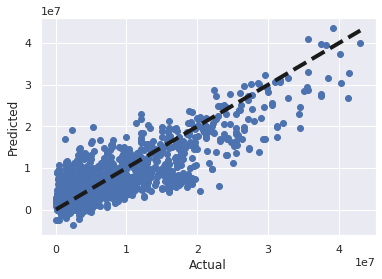

In [61]:
y_train_poly_pred = lm_reg_poly.predict(X_train_poly_scaled)
plt.scatter(y_train,y_train_poly_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4) 
plt.xlabel('Actual')
plt.ylabel('Predicted')


Text(0, 0.5, 'Predicted')

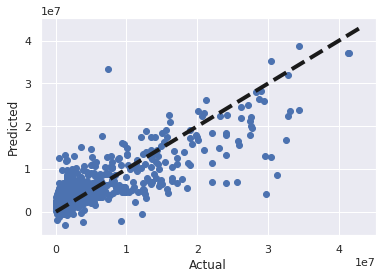

In [62]:
y_val_poly_pred = lm_reg_poly.predict(X_val_poly_scaled)
plt.scatter(y_val,y_val_poly_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4) 
plt.xlabel('Actual')
plt.ylabel('Predicted')


Text(0, 0.5, 'Predicted')

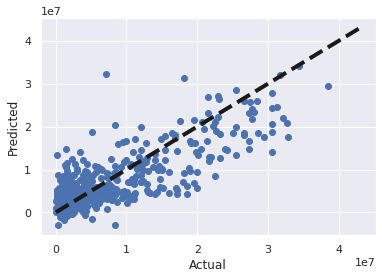

In [63]:
y_test_poly_pred = lm_reg_poly.predict(X_test_poly_scaled)
plt.scatter(y_test,y_test_poly_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4) 
plt.xlabel('Actual')
plt.ylabel('Predicted')

<ipython-input-70-e85915338751>:1: RuntimeWarning: invalid value encountered in log
  y_train_poly_pred = np.log(lm_reg_poly.predict(X_train_poly_scaled))


Text(0, 0.5, 'Predicted')

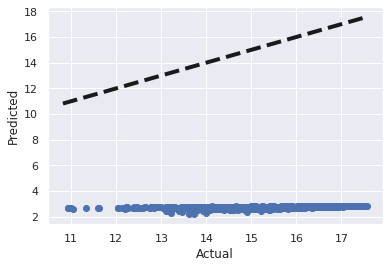

In [70]:
y_train_poly_pred = np.log(lm_reg_poly.predict(X_train_poly_scaled))
plt.scatter(np.log(y_train),np.log(y_train_poly_pred))
plt.plot([np.log(y.min()), np.log(y.max())], [np.log(y.min()), np.log(y.max())], 'k--', lw=4) 
plt.xlabel('Actual')
plt.ylabel('Predicted')
